In [1]:

#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

In [2]:
df=pd.read_csv ("train.csv")

In [3]:
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286


In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from sklearn.impute import SimpleImputer

## KMeans on 2 parameters without Scaling


First, let's observe how we can create a Kmeans clustering algorithm without any standard scaling. Keep in mind, the world of machine learning entails a combination of theory and experimentation.  


/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

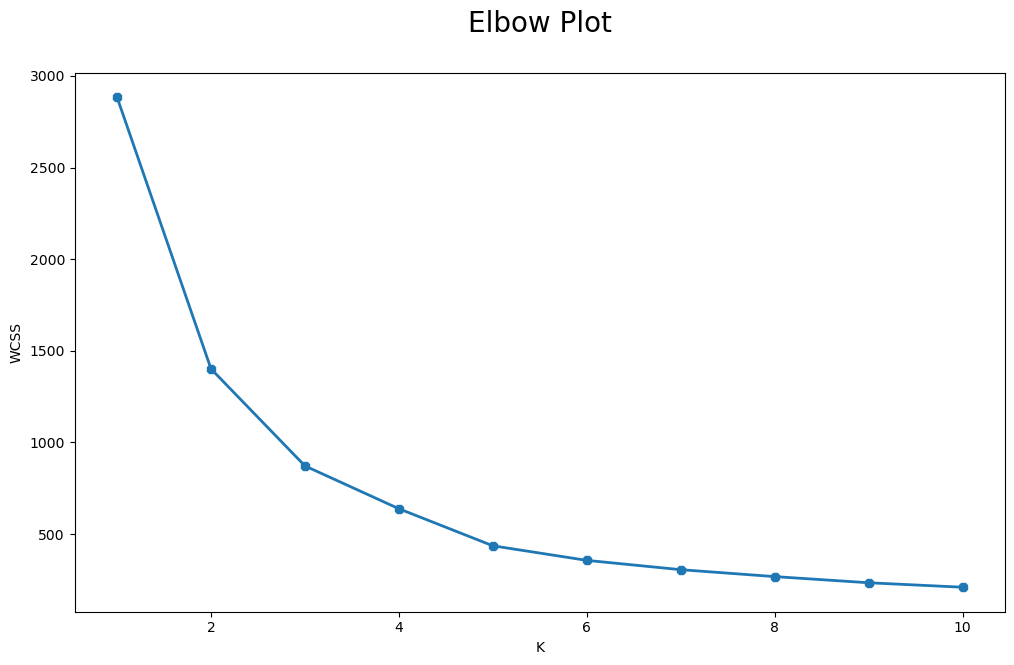

In [29]:
# create an elbow plot of WSS

X1 = df.loc[:, ['age', 'violence']].values
wcss= []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    # DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

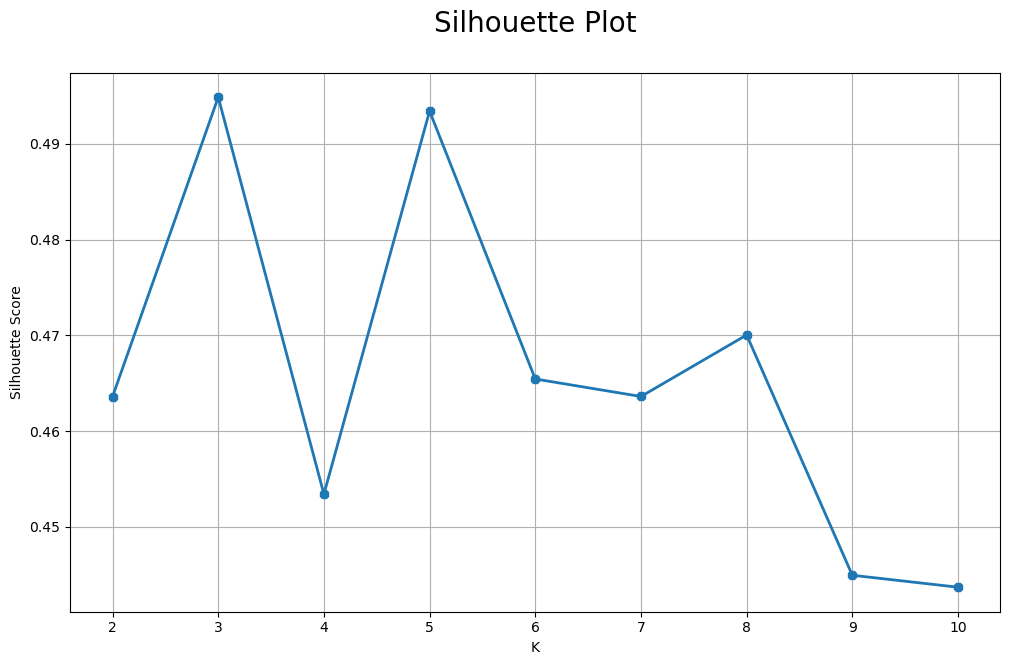

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Import silhouette_score from sklearn.metrics

# Assuming you already have X1 from previous code
# X1 = df.loc[:, ['age', 'violence']].values

silhouette = []
for k in range(2, 11):
    # Create a KMeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(silhouette_score(X1, predictions))  # Use silhouette_score directly

plt.figure(figsize=(12, 7))

plt.plot(range(2, 11), silhouette, linewidth=2, marker='8')
plt.title('Silhouette Plot\n', fontsize=20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [39]:
labels = kmeans.fit_predict(X1)
labels

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [40]:
kmeans.cluster_centers_

array([[0.82133269, 0.01375302],
       [0.41557171, 0.02332293],
       [0.13872522, 0.33827647],
       [0.52759085, 0.59120812],
       [0.44093336, 0.33994345],
       [0.60264333, 0.02310456],
       [0.23503169, 0.03334853],
       [0.07376433, 0.03275176],
       [0.16832226, 0.57316419],
       [0.73819851, 0.36028769]])

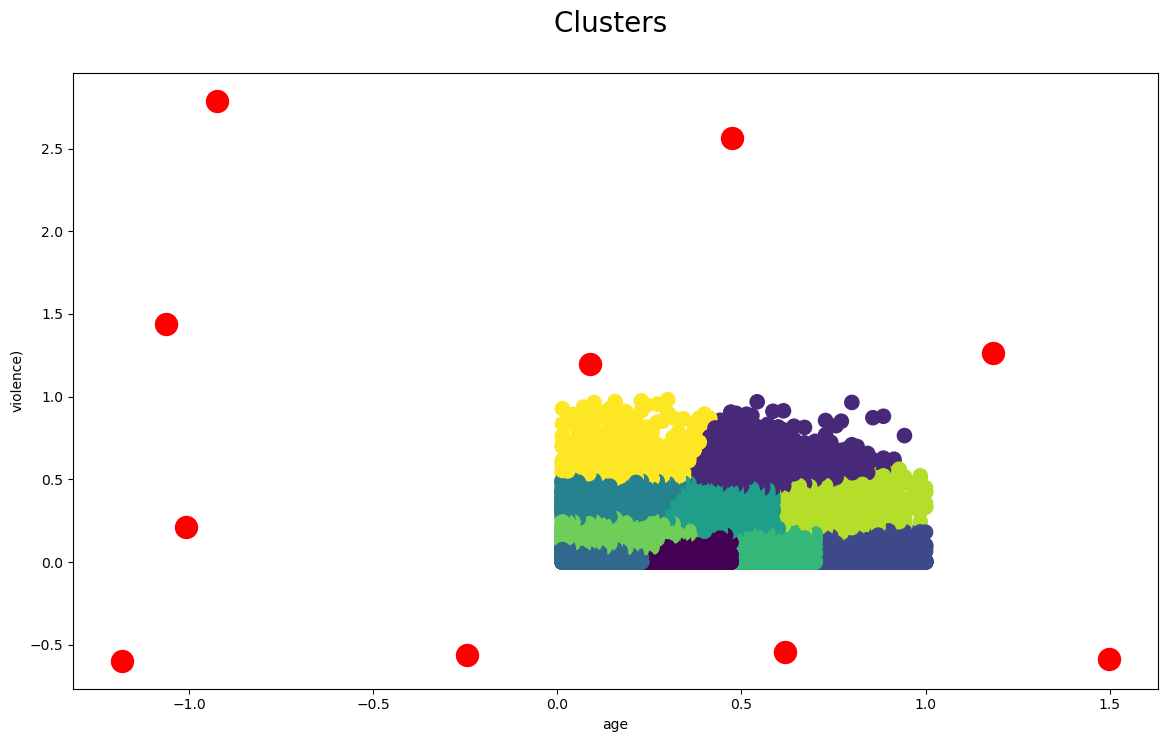

In [52]:
plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters \n', fontsize = 20)
plt.xlabel('age')
plt.ylabel('violence)')
plt.show()

## KMeans on 2 parameters with Scaling


In [42]:
# create an elbow plot of WSS on scaled values

# TODO: create and use the standard scaler object to ensure both variables have equal range
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()

# TODO: fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

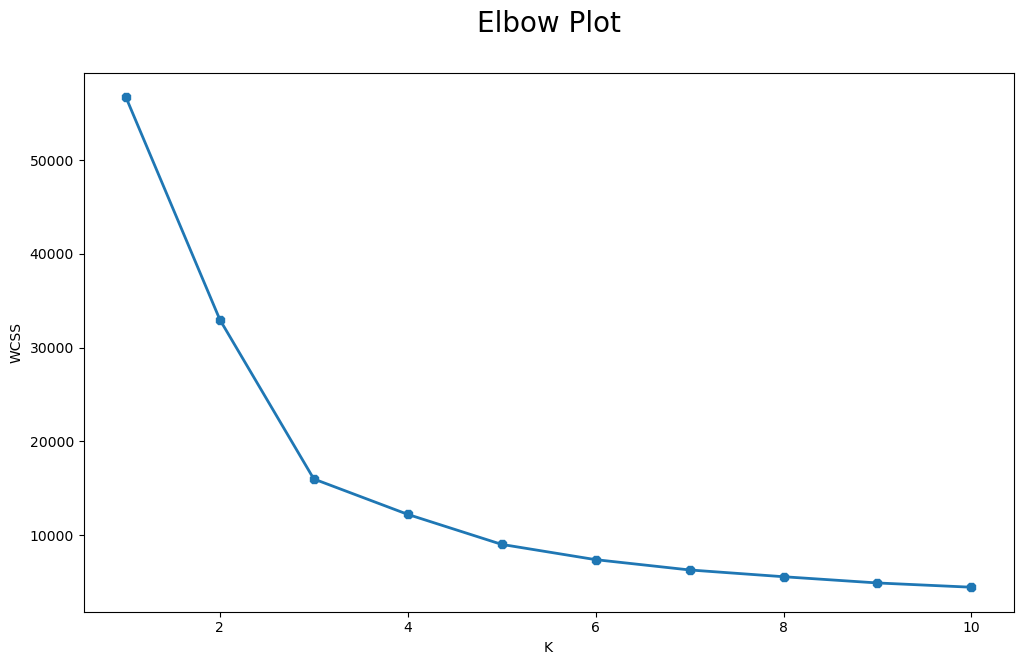

In [44]:
wcss_scaled = []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    # DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans =  KMeans(n_clusters=k, init='k-means++', random_state=42)

    # TODO: fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # TODO: append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

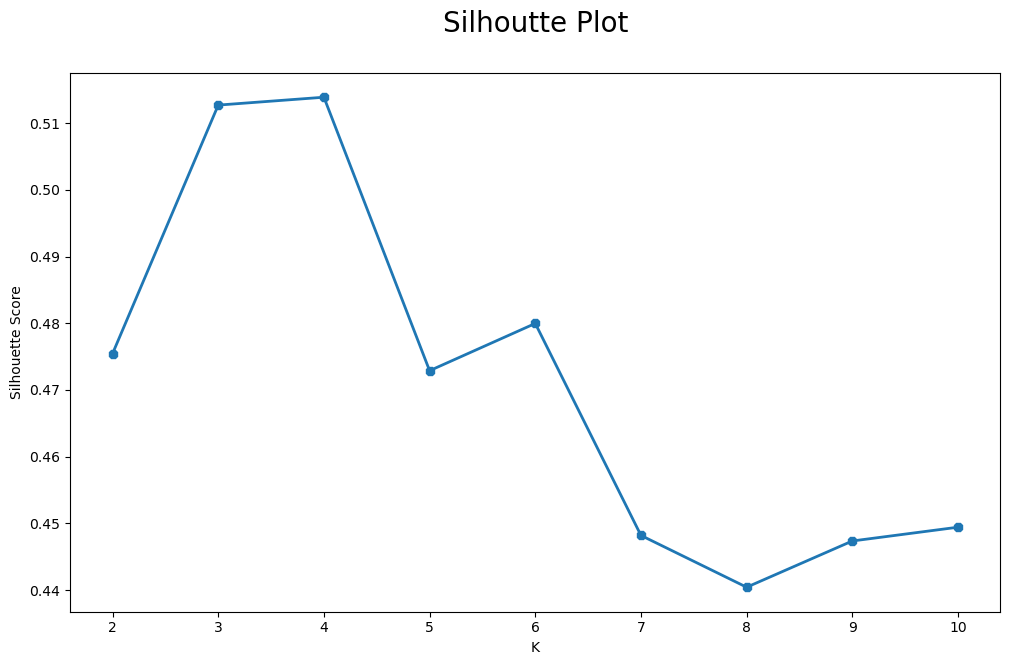

In [46]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(silhouette_score(X1_scaled, predictions))
plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

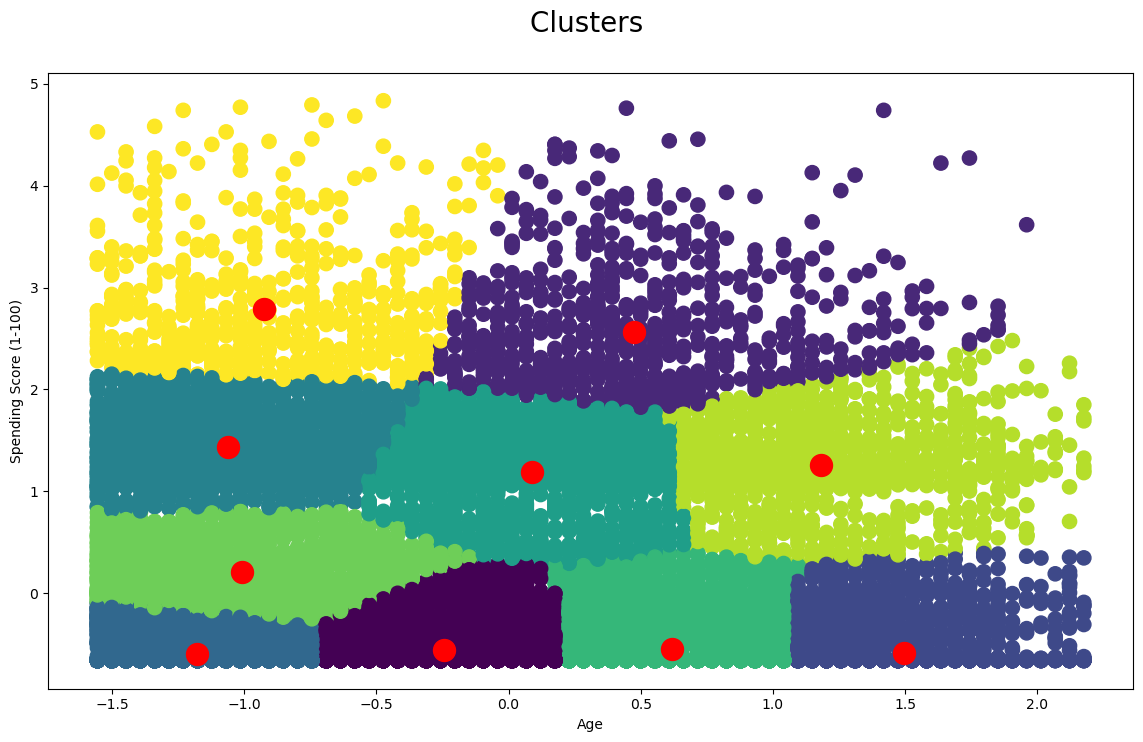

In [49]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', s=250, label='Centroids')
plt.title('Clusters \n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Kmeans with all Predictors


/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

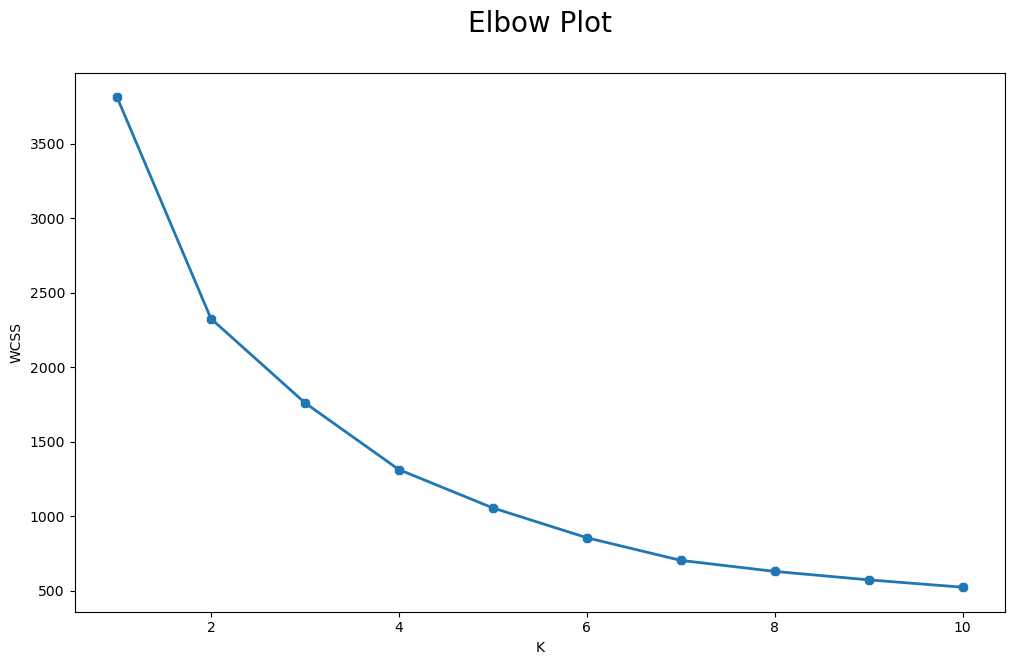

In [54]:
X4 = df[["age", "violence", "sadness"]]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

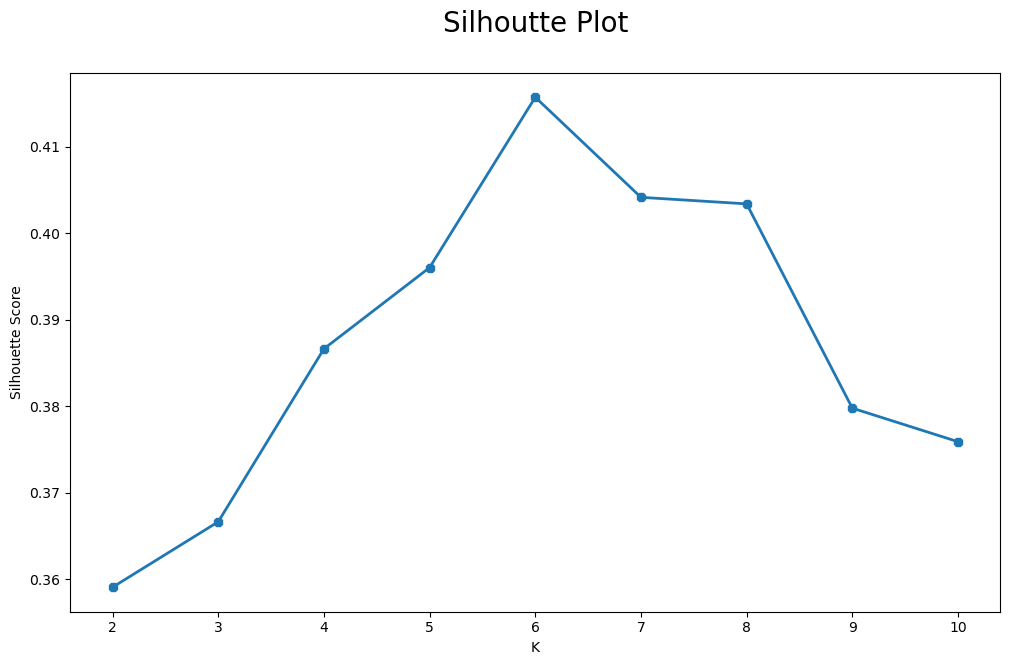

In [58]:
# create a plot of silhoutte score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X4)
    silhouette.append(silhouette_score(X4, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [59]:
# create a KMeans clustering algo on this optimal number of clusters and generate labels

kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X4)
X4['label'] = clusters

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/43/b4b3714d1rn7gx893h05_0_c0000gn/T/ipykernel_97403/2827043638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['label'] = clusters


In [60]:
X4['label']

0        4
1        2
2        2
3        2
4        2
        ..
28357    3
28358    3
28359    3
28360    3
28361    3
Name: label, Length: 28362, dtype: int32

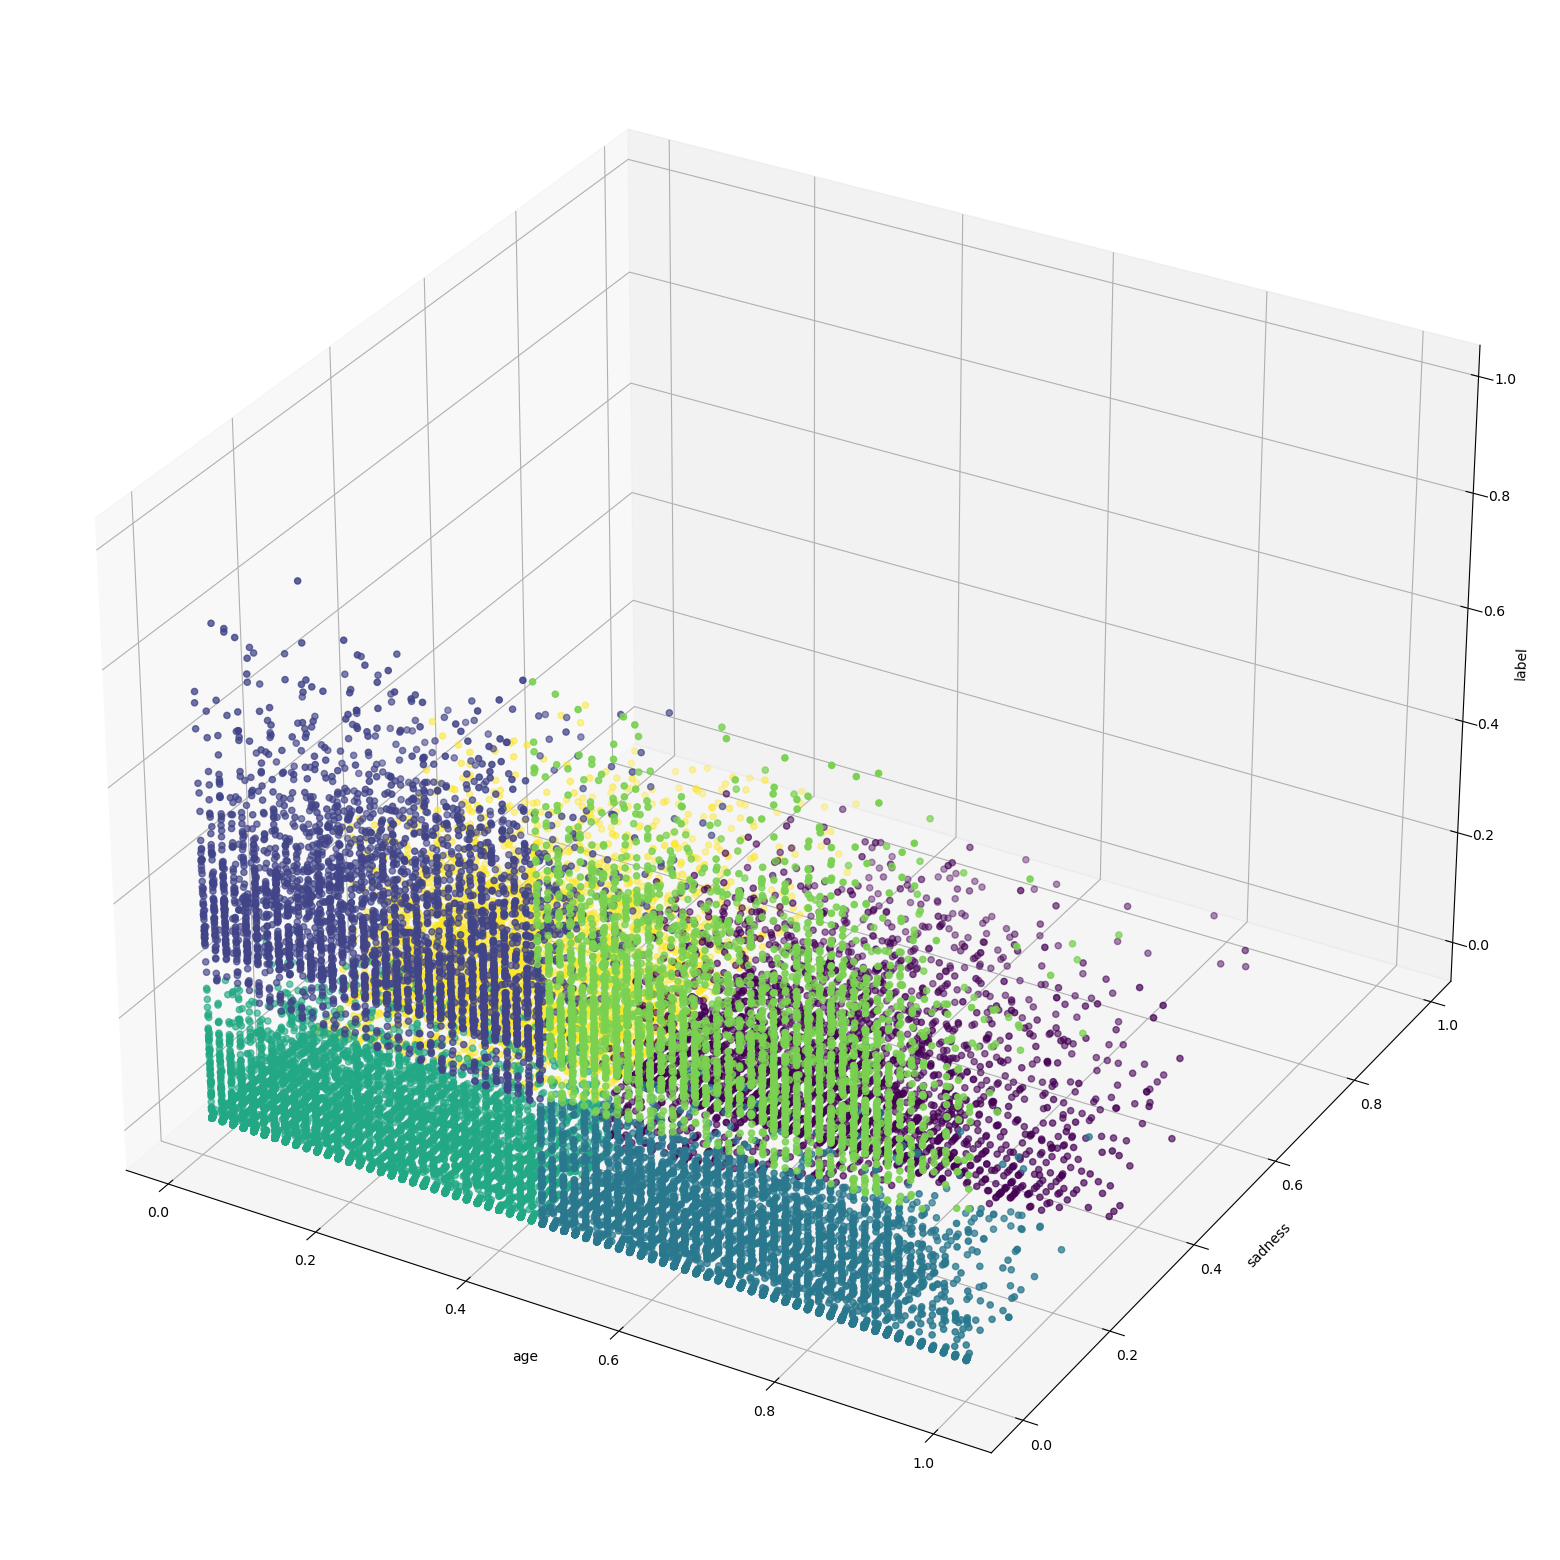

In [61]:
# make a 3D plot of clusters

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X4["age"], X4["violence"], X4["sadness"], c=X4["label"])

ax.set_xlabel('age')
ax.set_ylabel('sadness')
ax.set_zlabel('label')

plt.gcf().set_size_inches((20, 20))  
plt.show()